In [1]:
import pickle

import matplotlib.pyplot as plt
import healpy as hp
import numpy as np

from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
data = pickle.load(open("/home/laclavere/Thesis/qubic/qubic/scripts/MapMaking/src/CMM/parametric_d0_DB_test/maps/test_seed1_None_k0.pkl", "rb"))
print(data["fwhm_rec"])

[0.00535928]


In [3]:
data.keys()

dict_keys(['components_in', 'components_in_convolved', 'components_iter', 'residual', 'beta', 'beta_true', 'index_beta', 'g', 'gi', 'all_gain', 'A', 'Atrue', 'G', 'nus_in', 'nus_out', 'center', 'coverage', 'seenpix', 'fwhm_in', 'fwhm_out', 'fwhm_rec', 'parameters', 'convergence', 'TOD_qubic', 'TOD_external', 'qubic_dict'])

In [5]:
fwhm_in = data["fwhm_in"]
fwhm_out = data["fwhm_out"]
fwhm_rec = data["fwhm_rec"]

Ccmb = HealpixConvolutionGaussianOperator(fwhm_rec)
Cdust = HealpixConvolutionGaussianOperator(fwhm_rec)
C = [Ccmb, Cdust]
comp_maps_input = data["components_in_convolved"]
# comp_maps_input = np.array([C[i](data["components_in"][i]) for i in range(comp_maps_input.shape[0])])
# comp_maps_input = data["components_in_convolved"] 
comp_maps_rec = data["components_iter"]
comp_maps_res = comp_maps_input - comp_maps_rec
center = data["center"]
seenpix = data["seenpix"]
convergence = data["convergence"]
print(comp_maps_input.shape)

(1, 196608, 3)


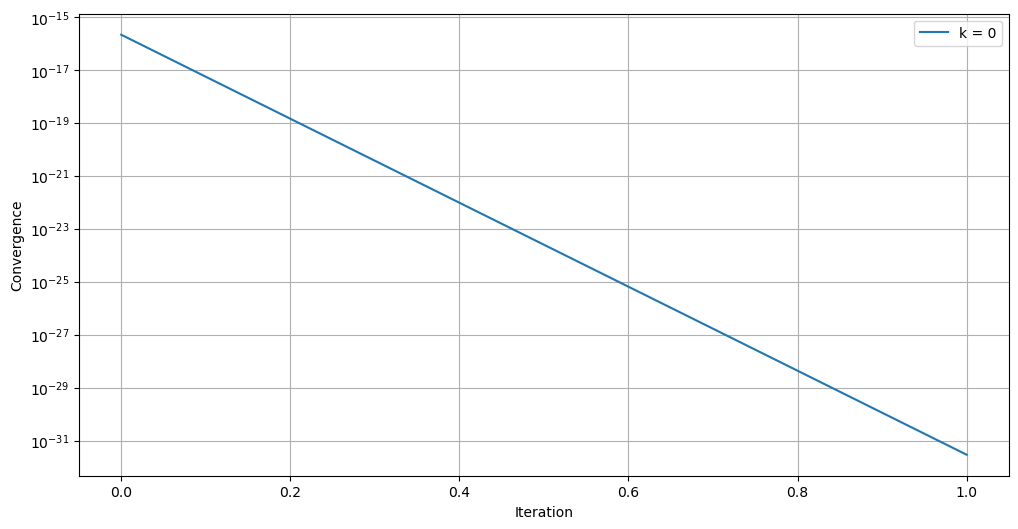

In [6]:
plt.figure(figsize=(12, 6))
for i in range(len(convergence)):
    plt.plot(convergence[i], label=f"k = {i}")

plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.legend()
plt.grid()
plt.yscale("log")
plt.legend()

In [7]:
print(convergence)

[array([2.19099626e-16, 2.91523021e-32])]


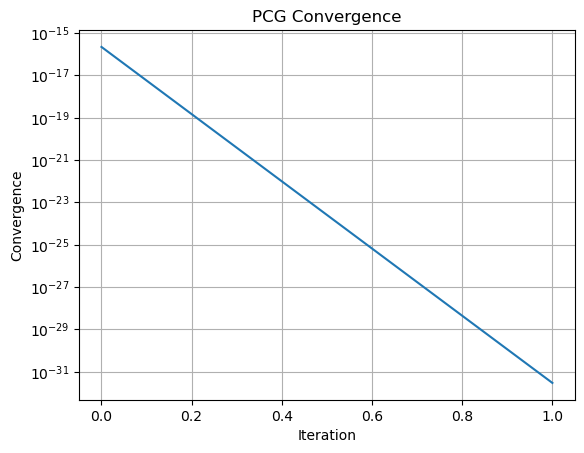

In [8]:
plt.plot(convergence[0])
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.title("PCG Convergence")
plt.yscale("log")
plt.grid()
plt.show()

In [9]:
print("FWHM in: ", fwhm_in)
print("mean fwhm in: ", np.mean(fwhm_in))
print("FWHM out: ", fwhm_out)
print("FWHM rec: ", fwhm_rec)

FWHM in:  [0.0075867  0.0071247  0.00669084 0.0062834  0.00517275 0.00485775
 0.00456193 0.00428413]
mean fwhm in:  0.00582027449536616
FWHM out:  [0. 0. 0. 0. 0. 0. 0. 0.]
FWHM rec:  [0.00535928]


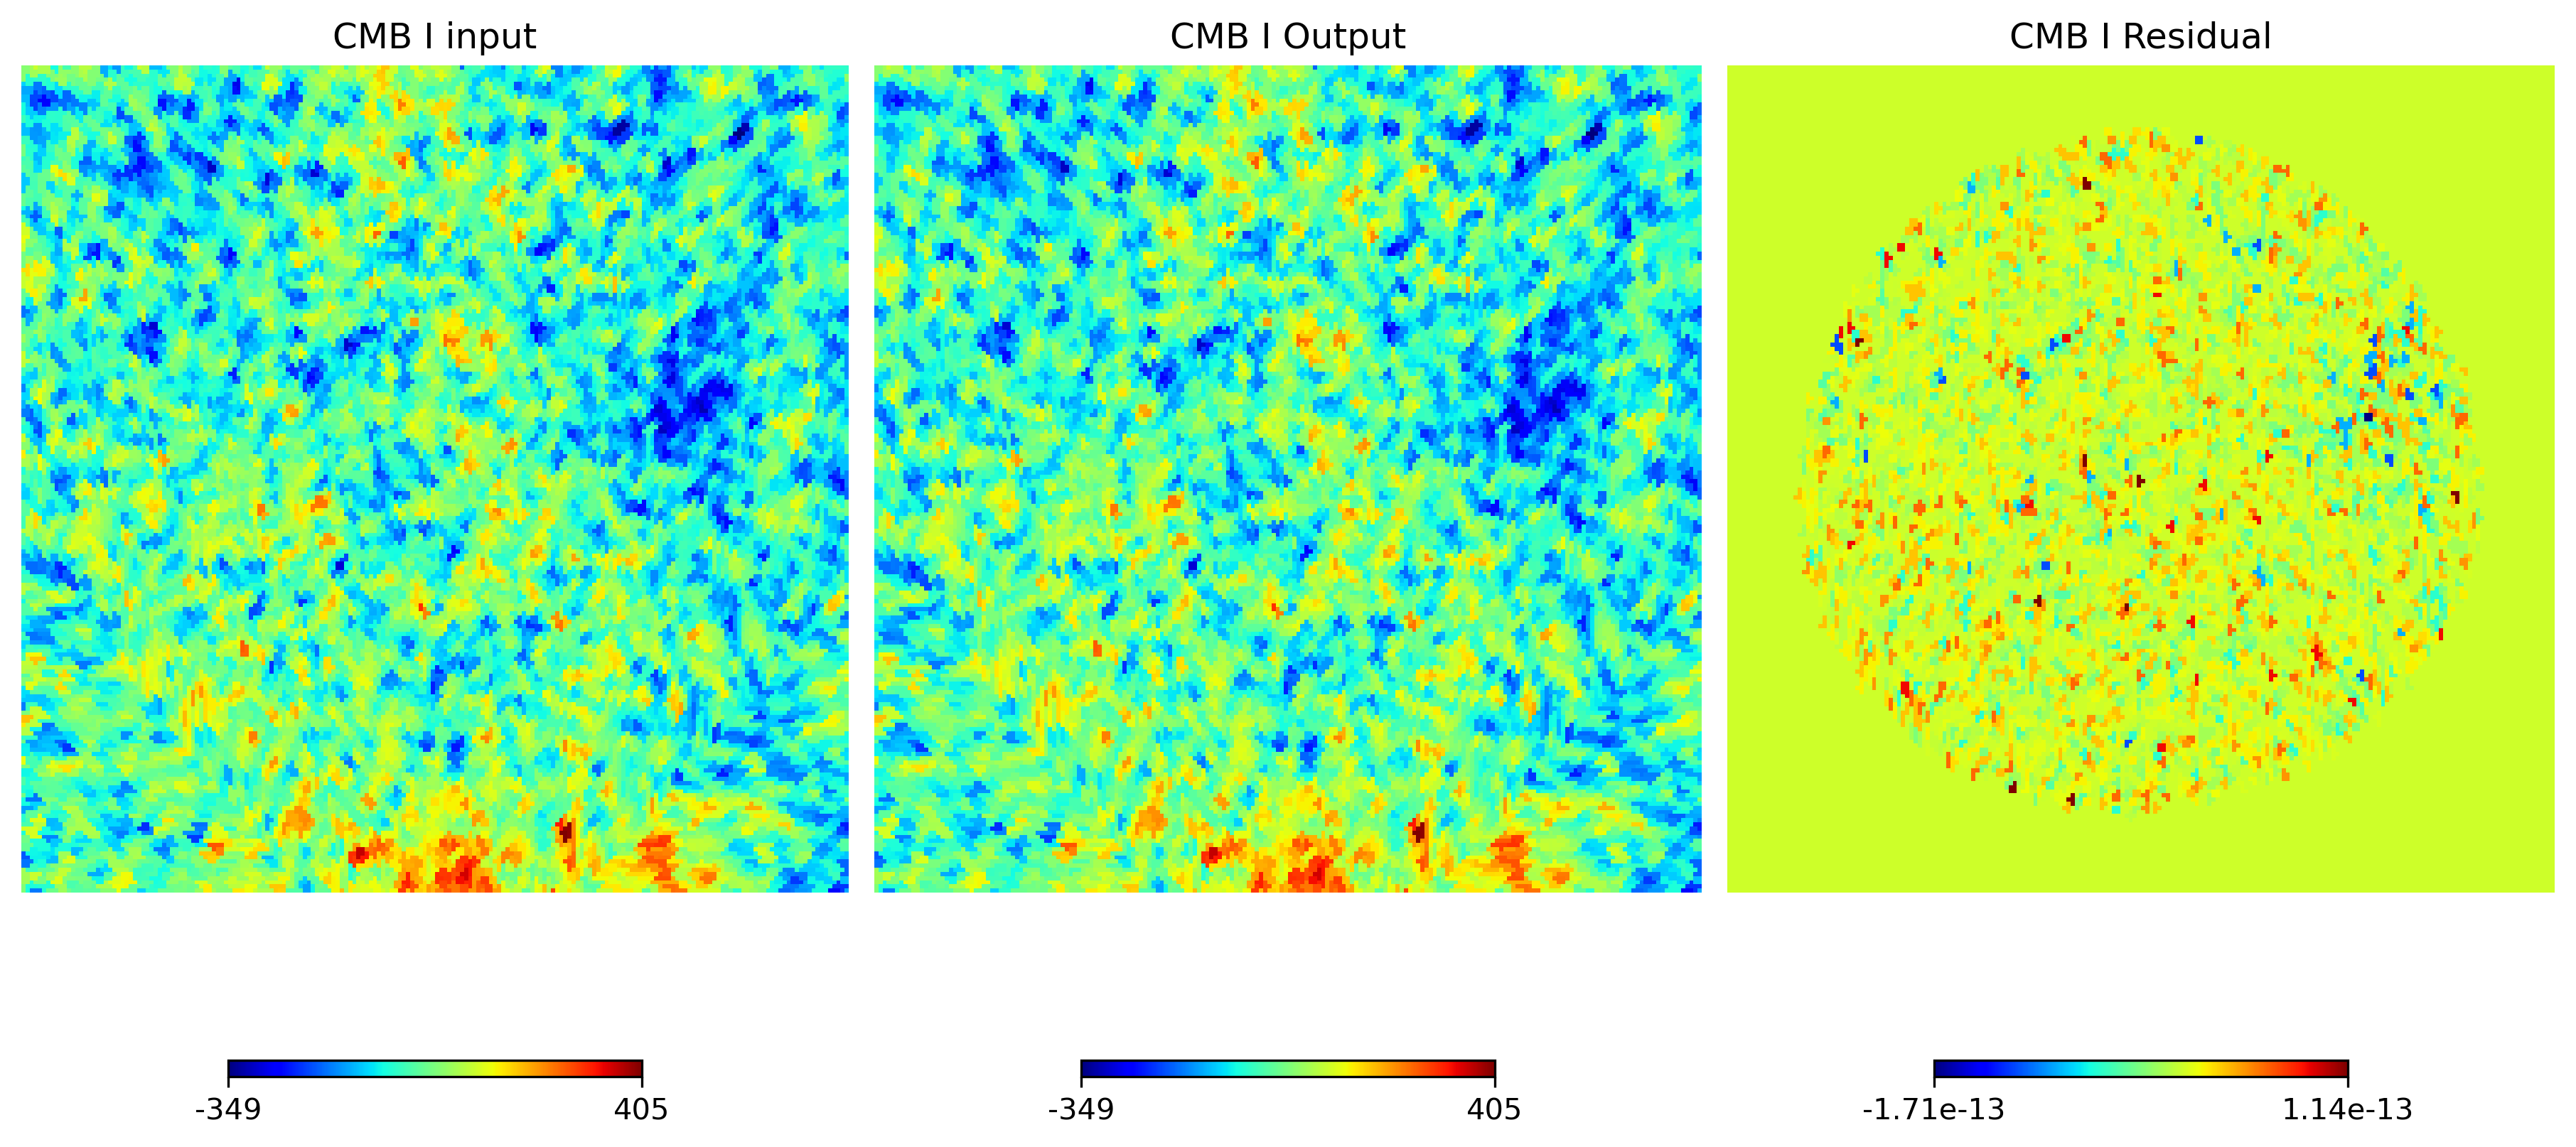

In [10]:
plt.figure(figsize=(12, 10), dpi=300)
name_comp = ["CMB", "Dust", "Synchrotron"]
STOKES = ["I", "Q", "U"]

# comp_maps_input[:, ~seenpix, :] = hp.UNSEEN
# comp_maps_rec[:, ~seenpix, :] = hp.UNSEEN
# comp_maps_res[:, ~seenpix, :] = hp.UNSEEN


istk = 0
n = comp_maps_input.shape[0]
sigma_input = np.std(comp_maps_input[:, seenpix, istk], axis=0)
sigma_rec = np.std(comp_maps_rec[:, seenpix, istk], axis=0)
sigma_res = np.std(comp_maps_rec[:, seenpix, istk] - comp_maps_input[:, seenpix, istk], axis=0)

reso = 15

k = 0

for icomp in range(n):
    hp.gnomview((comp_maps_input[icomp, :, istk]), rot=center,

                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} input",  
                        cmap="jet",
                        # min = - n * sigma_input[icomp],
                        # max = n * sigma_input[icomp],
                        sub=(n, 3, k + 1))
    
    hp.gnomview((comp_maps_rec[icomp, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} Output",  
                        cmap="jet",
                        # min = - n * sigma_rec[icomp],
                        # max = n * sigma_rec[icomp],
                        sub=(n, 3, k + 2))
    
    hp.gnomview(comp_maps_res[icomp, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} Residual",  
                        cmap="jet",
                        # min = - n * sigma_res[icomp],
                        # max = n * sigma_res[icomp],
                        sub=(n, 3, k + 3))
    k += 3

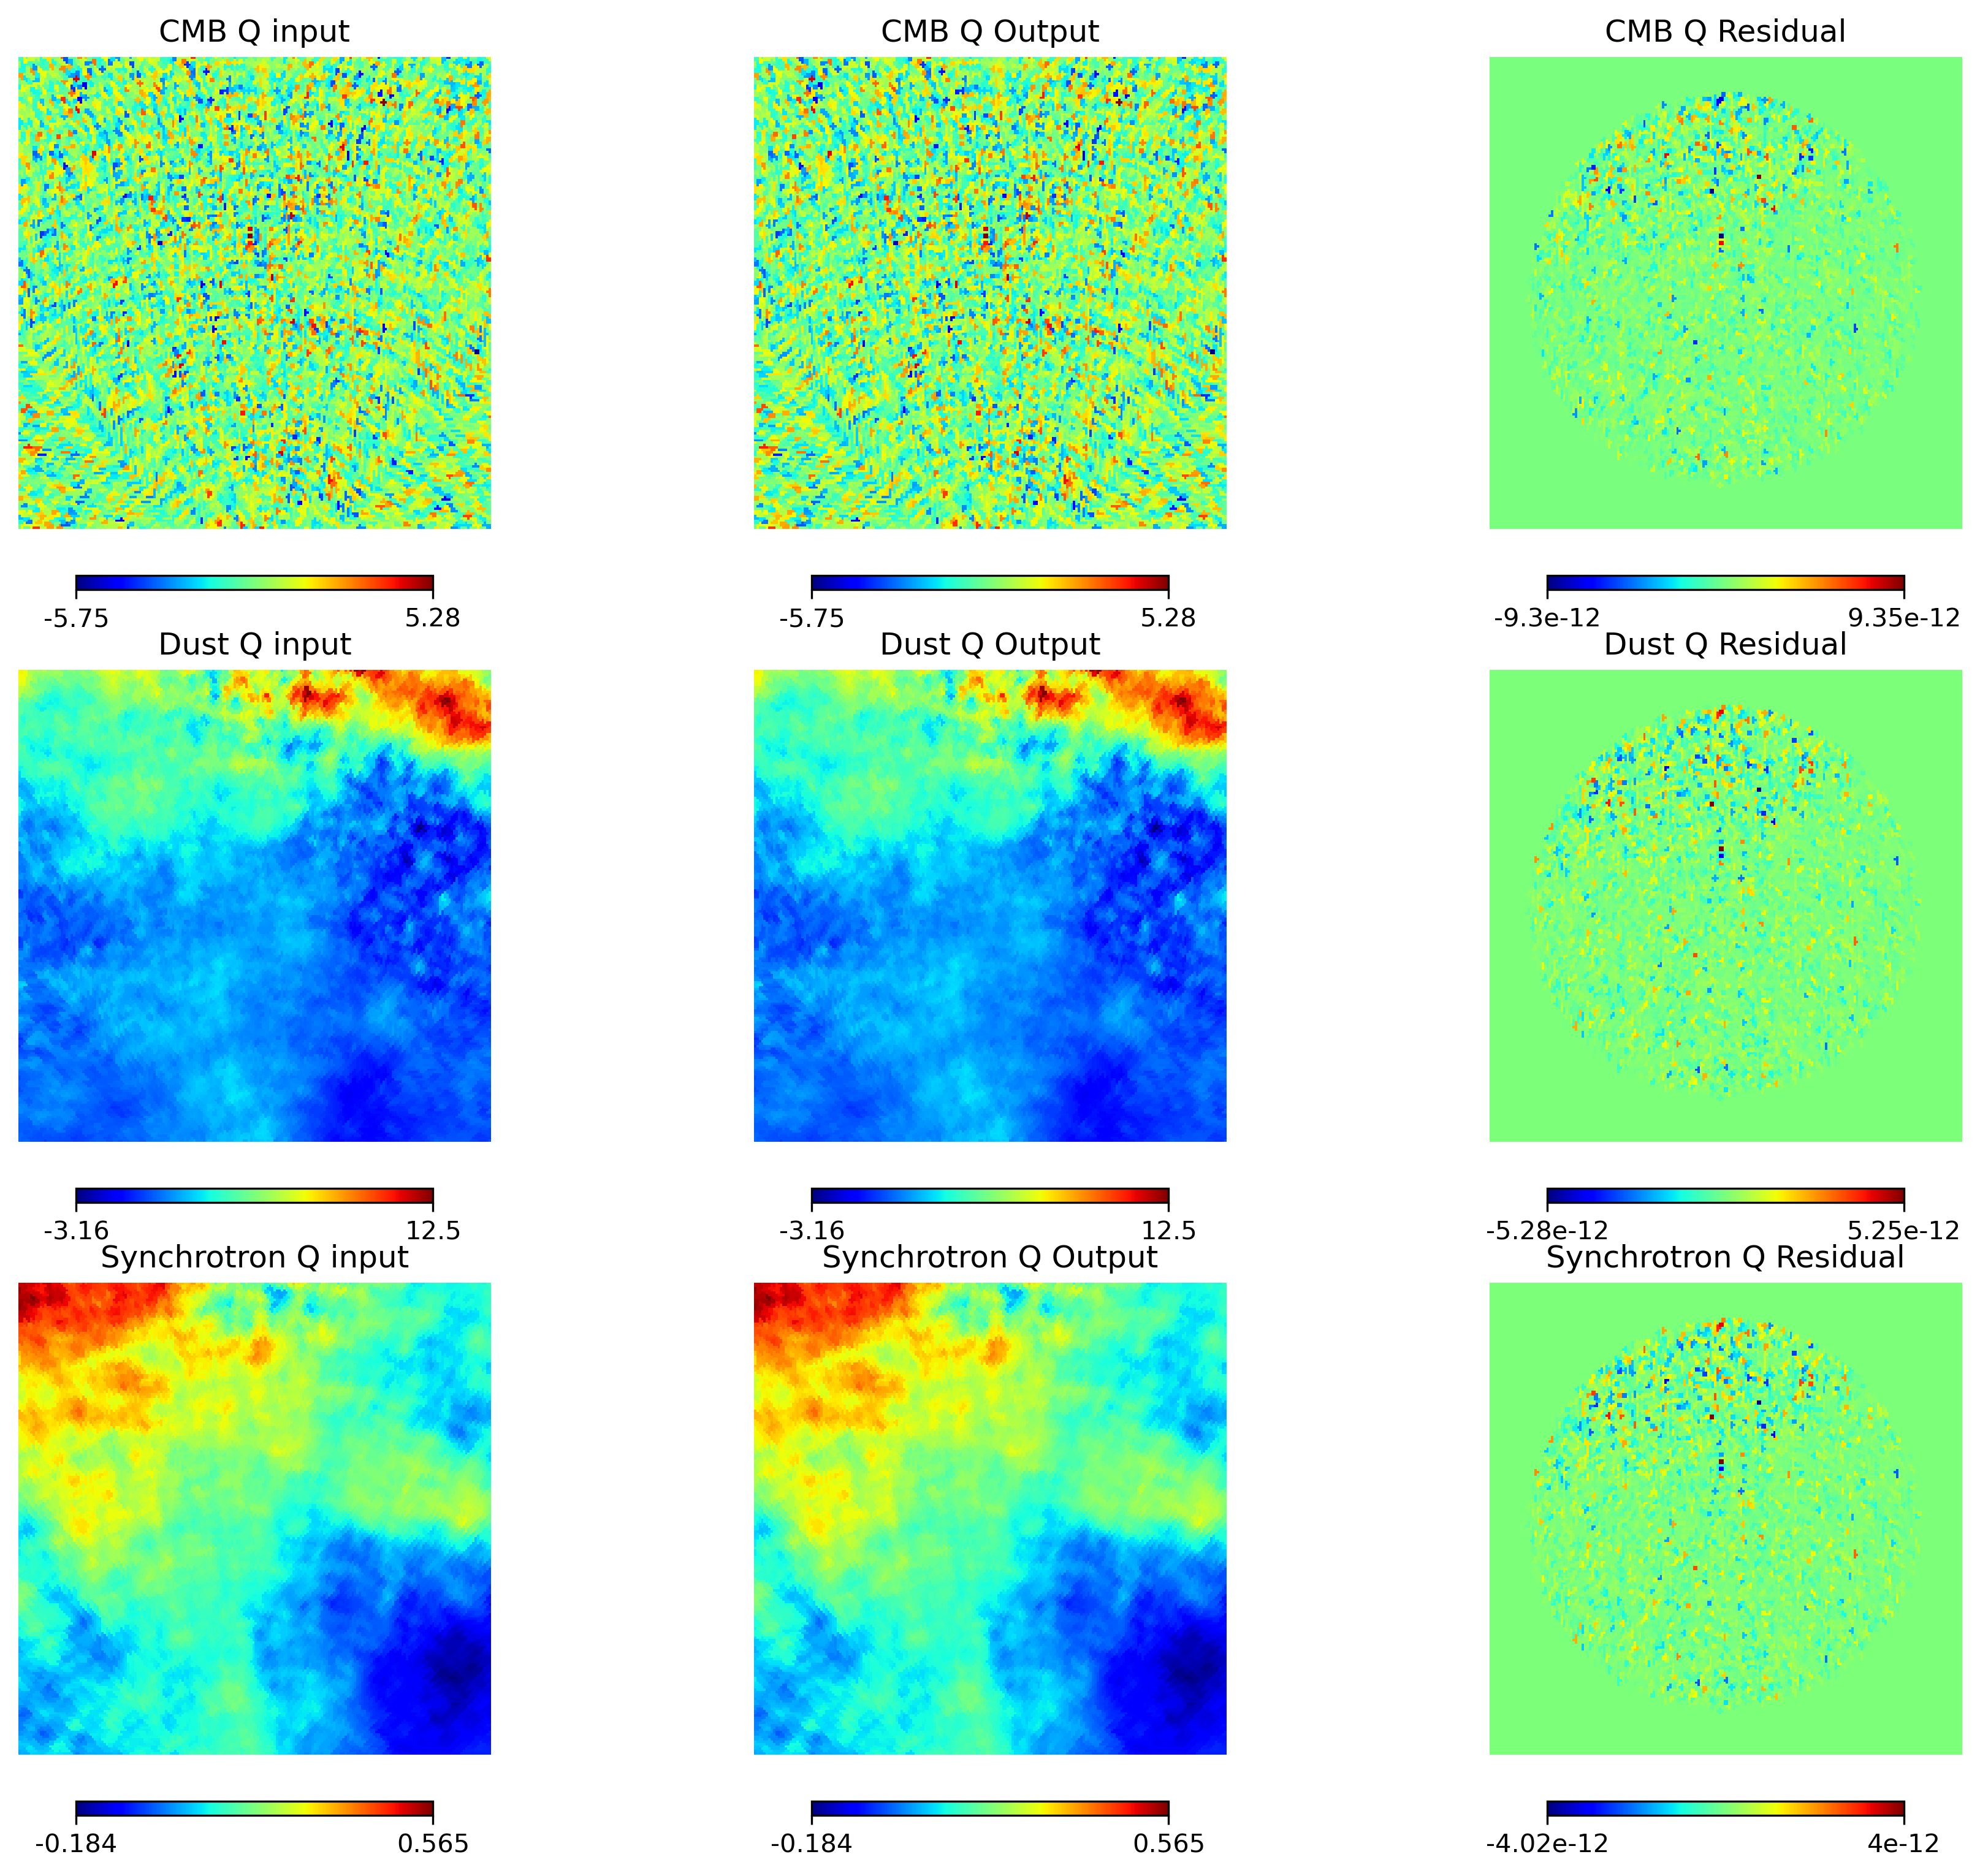

In [ ]:
plt.figure(figsize=(12, 10), dpi=300)

# comp_maps_input[:, ~seenpix, :] = hp.UNSEEN
# comp_maps_rec[:, ~seenpix, :] = hp.UNSEEN
# comp_maps_res[:, ~seenpix, :] = hp.UNSEEN

k = 0
istk = 1

for icomp in range(n):
    hp.gnomview((comp_maps_input[icomp, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} input",  
                        cmap="jet",
    
                        sub=(n, 3, k + 1))
    
    hp.gnomview((comp_maps_rec[icomp, :, istk]), rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} Output",  
                        cmap="jet",
         
                        sub=(n, 3, k + 2))
    
    hp.gnomview(comp_maps_res[icomp, :, istk], rot=center,
                        reso=reso,
                        notext=True,
                        title=f"{name_comp[icomp]} {STOKES[istk]} Residual",
                        cmap="jet",
                   
                        sub=(n, 3, k + 3))
    k += 3

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
icomp = 1

test_in = data["components_in"][icomp].copy()
test_out = data["components_iter"][icomp].copy()

test_in[~seenpix, :] = 0
test_out[~seenpix, :] = 0

In [ ]:
def chi2_fwhm(fwhm):
    C = HealpixConvolutionGaussianOperator(fwhm)
    input_maps = C(test_in)
        
    return np.mean((test_out - input_maps) ** 2)

In [ ]:
list_chi2 = []

fwhm = np.logspace(np.log10(0.0005), np.log10(0.05), num=80)
for i in fwhm:
    list_chi2.append(chi2_fwhm(i))

list_chi2 = np.array(list_chi2)

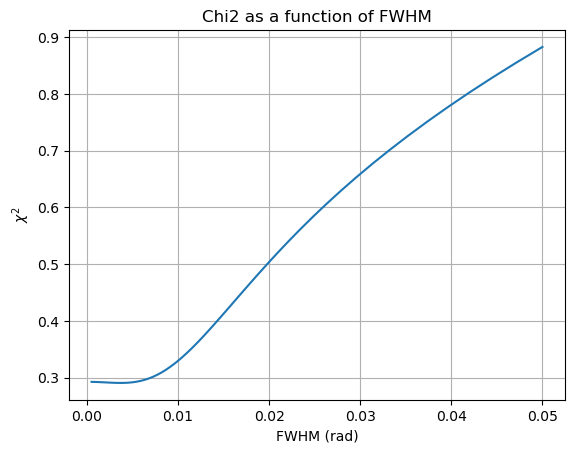

In [ ]:
plt.plot(fwhm, list_chi2)
plt.xlabel("FWHM (rad)")
plt.ylabel(r"$\chi^2$")
plt.title("Chi2 as a function of FWHM")
plt.grid()
plt.show()

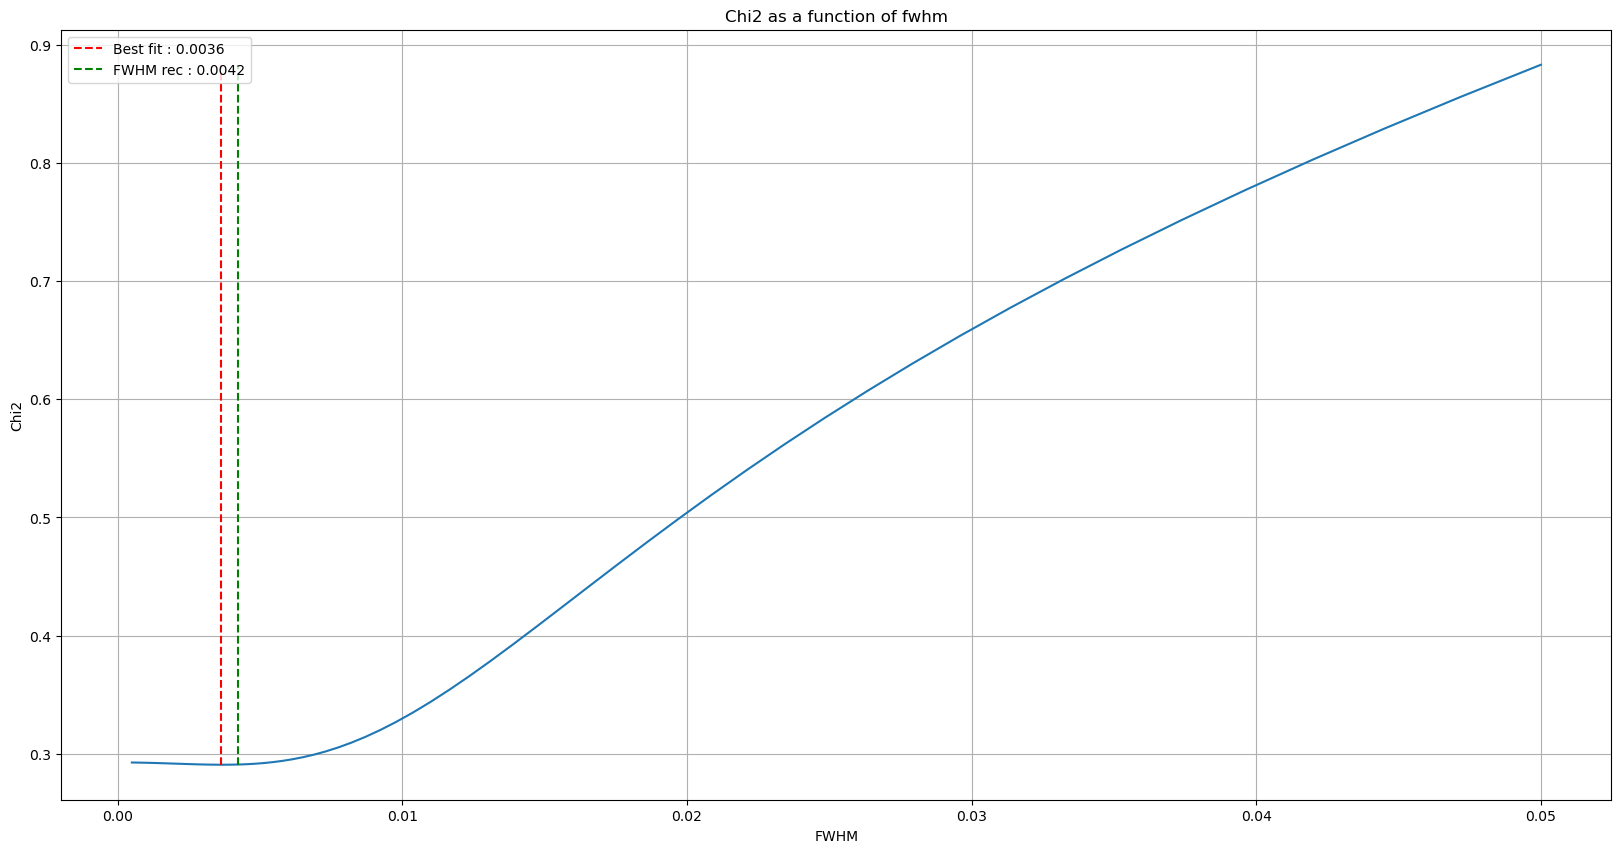

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(fwhm, list_chi2)
plt.vlines(fwhm[np.where(list_chi2 == np.min(list_chi2))[0][0]], np.min(list_chi2), np.max(list_chi2), color="red", linestyle="--", label=f"Best fit : {fwhm[np.where(list_chi2 == np.min(list_chi2))[0][0]].round(4)}")
plt.vlines(fwhm_rec, np.min(list_chi2), np.max(list_chi2), color="green", linestyle="--", label=f"FWHM rec : {fwhm_rec.round(4)}")
plt.title("Chi2 as a function of fwhm")
plt.xlabel("FWHM")
plt.ylabel("Chi2")
plt.grid()
plt.legend()
plt.show()